Objective:

1. Which are the most popular face masks out there?
2. What do consumers like about them? Why?
3. What different profiles of consumers buy masks? 


Additional questions for understanding the data:



1.   Which are most reviewed masks?
2.   Which is the unit price of each mask?
3.   What is the yearwise trend of reviews?



In [194]:
import pandas as pd

In [195]:
product_data = pd.read_csv('/content/assignment 3 data 1.csv')
review_data = pd.read_csv('/content/assignment 3 data 2 reviews.csv')

product_data and review_data is dataframe of product and review datasets

In [196]:
product_data.head()

,product_id,product_name,product_price,price_currency,product_availability,product_url,source_url
0,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks
1,101774,"HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/HIGUARD-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks
2,101955,"SunJoy, KN95, Professional Protective Disposab...",8.86,AUD,http://schema.org/InStock,https://au.iherb.com/pr/SunJoy-KN95-Profession...,https://au.iherb.com/c/protective-face-masks
3,103838,"Lozperi, Copper Mask, Adult, Black, 1 Mask",6.85,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...,https://au.iherb.com/c/protective-face-masks
4,102734,"Zidian, Disposable Protective Mask, 50 Pack",15.35,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Zidian-Disposable-Prot...,https://au.iherb.com/c/protective-face-masks


In [197]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            27 non-null     int64  
 1   product_name          27 non-null     object 
 2   product_price         27 non-null     float64
 3   price_currency        27 non-null     object 
 4   product_availability  27 non-null     object 
 5   product_url           27 non-null     object 
 6   source_url            27 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.6+ KB


# **Which are the most expensive masks in the market?**

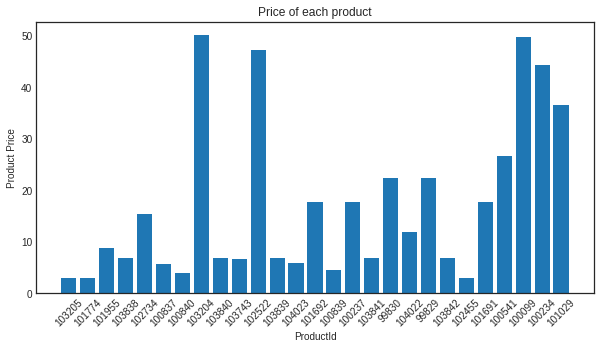

In [198]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(x=product_data['product_id'].astype(str),height=product_data['product_price'])
plt.xticks(rotation=45)
plt.title('Price of each product')
plt.ylabel('Product Price')
plt.xlabel('ProductId')
plt.show()

There is a high amount of disparity in Product price as some masks' price is its unit price while some are sold as pack of 10 or 25 , which makes its price high as compared to others.

# For finding unit price:

Did some excel manipulation and made a new file in excel with Unit price of each mask.

What I did was:


*   Split name of each mask with respect to comma and last part will give quantity in one pack
*   Divide price by quantity



In [199]:
df_for_unit_price = pd.read_csv('/content/assignment 3 data 1_updated_with_unit_price.csv')
columns = ['product_url','source_url','price_currency','product_availability']
df_for_unit_price.drop(columns,axis=1,inplace = True)
df_for_unit_price = df_for_unit_price.sort_values(by = ['Unit_price'])

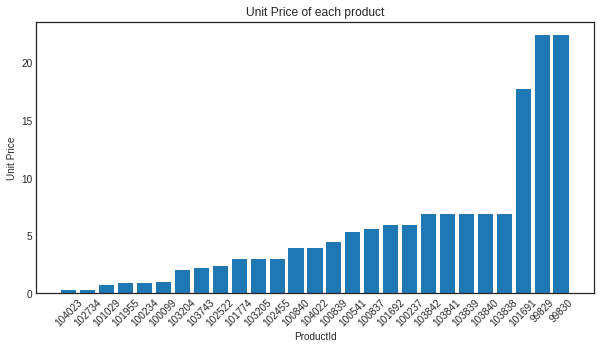

In [200]:
plt.figure(figsize=(10,5))
plt.bar(x=df_for_unit_price['product_id'].astype(str),height=df_for_unit_price['Unit_price'])
plt.xticks(rotation=45)
plt.title('Unit Price of each product')
plt.ylabel('Unit Price')
plt.xlabel('ProductId')
plt.show()

The most expensive masks are:

*   99830  -- Kosette, Nano Reusable Face Protection Mask, Medium, 1 Mask
*   99829  --  Kosette, Nano Reusable Face Protection Mask, Large, 1 Mask






  



Removing unnecessary columns from product_data dataframe

In [201]:
columns = ['product_url','source_url','price_currency','product_availability','product_name']
product_data.drop(columns,axis=1,inplace = True)

In [202]:
product_data['productId'] = product_data['product_id']

In [203]:
product_data.drop('product_id',axis = 1,inplace = True)

In [204]:
product_data

,product_price,productId
0,2.95,103205
1,2.95,101774
2,8.86,101955
3,6.85,103838
4,15.35,102734
5,5.61,100837
6,3.93,100840
7,50.19,103204
8,6.85,103840
9,6.61,103743


Exploring review_data

In [205]:
review_data.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle
0,0,iHerb Customer,0,6,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,34.0,50,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1614071051,en-US,NaN,NaN
1,0,iHerb Customer,0,0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,37.0,50,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1612659399,ru-RU,The grandson really liked it. Comfortable mask.,en-US
2,0,iHerb Customer,0,0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,3.0,40,Easy to put on & comfortable to wear.,Good,False,1612647603,en-US,NaN,NaN
3,0,InnaIgorevna,0,0,2890ac54-8707-418e-be3e-8d46231e3672,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,16.0,40,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,False,1612542569,ru-RU,A thin mask that is pleasant to the body. I li...,en-US
4,0,iHerb Customer,0,0,9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,19.0,50,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,False,1612518222,ru-RU,Great mask! It suited me perfectly. There is a...,en-US


In [206]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3849 entries, 0 to 3848
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   abuseCount                          3849 non-null   int64  
 1   customerNickname                    3849 non-null   object 
 2   helpfulNo                           3849 non-null   int64  
 3   helpfulYes                          3849 non-null   int64  
 4   id                                  3849 non-null   object 
 5   imagesCount                         3849 non-null   int64  
 6   languageCode                        3849 non-null   object 
 7   postedDate                          3849 non-null   object 
 8   productId                           3849 non-null   int64  
 9   profileInfo.ugcSummary.answerCount  3843 non-null   float64
 10  profileInfo.ugcSummary.reviewCount  3843 non-null   float64
 11  ratingValue                         3849 no

Merging both review_data and product_data

In [207]:
data = pd.merge(product_data,review_data,on = 'productId' )


In [208]:
data.shape

(3849, 20)

Columns of combined dataset

In [209]:
data.columns

Index(['product_price', 'productId', 'abuseCount', 'customerNickname',
       'helpfulNo', 'helpfulYes', 'id', 'imagesCount', 'languageCode',
       'postedDate', 'profileInfo.ugcSummary.answerCount',
       'profileInfo.ugcSummary.reviewCount', 'ratingValue', 'reviewText',
       'reviewTitle', 'reviewed', 'score', 'languageCode.1',
       'translation.reviewText', 'translation.reviewTitle'],
      dtype='object')

Finding null values in the dataset

In [210]:
data.isnull().sum()

product_price                            0
productId                                0
abuseCount                               0
customerNickname                         0
helpfulNo                                0
helpfulYes                               0
id                                       0
imagesCount                              0
languageCode                             0
postedDate                               0
profileInfo.ugcSummary.answerCount       6
profileInfo.ugcSummary.reviewCount       6
ratingValue                              0
reviewText                               0
reviewTitle                              0
reviewed                                 0
score                                    0
languageCode.1                           0
translation.reviewText                1855
translation.reviewTitle               1855
dtype: int64

# OBSERVATIONS:

These null values in translation.reviewText and translation.reviewTitle is because reviews which are in English are left blank.


So next task is to join the reviews in English and reviews translated to English into one column, then we can get rid of few  columns in the dataset.

In [211]:
data['Final_Review'] = data['translation.reviewText'].fillna(data['reviewText'])


In [212]:
columns = ['reviewText','translation.reviewText','reviewTitle','translation.reviewTitle']
data = data.drop(columns,axis = 1)

In [213]:
data.isnull().sum()

product_price                         0
productId                             0
abuseCount                            0
customerNickname                      0
helpfulNo                             0
helpfulYes                            0
id                                    0
imagesCount                           0
languageCode                          0
postedDate                            0
profileInfo.ugcSummary.answerCount    6
profileInfo.ugcSummary.reviewCount    6
ratingValue                           0
reviewed                              0
score                                 0
languageCode.1                        0
Final_Review                          0
dtype: int64

In [214]:
data.shape

(3849, 17)

In [215]:
data = data.dropna()

In [216]:
data.shape

(3843, 17)

In [217]:
data['Date'] = data['postedDate'].str[:4]
data.drop('postedDate',axis = 1, inplace = True)

# **Which are the most reviewed masks?**

In [218]:
df_for_most_sold = data.groupby('productId').count()
df_for_most_sold = df_for_most_sold.sort_values(by = ['reviewed'])

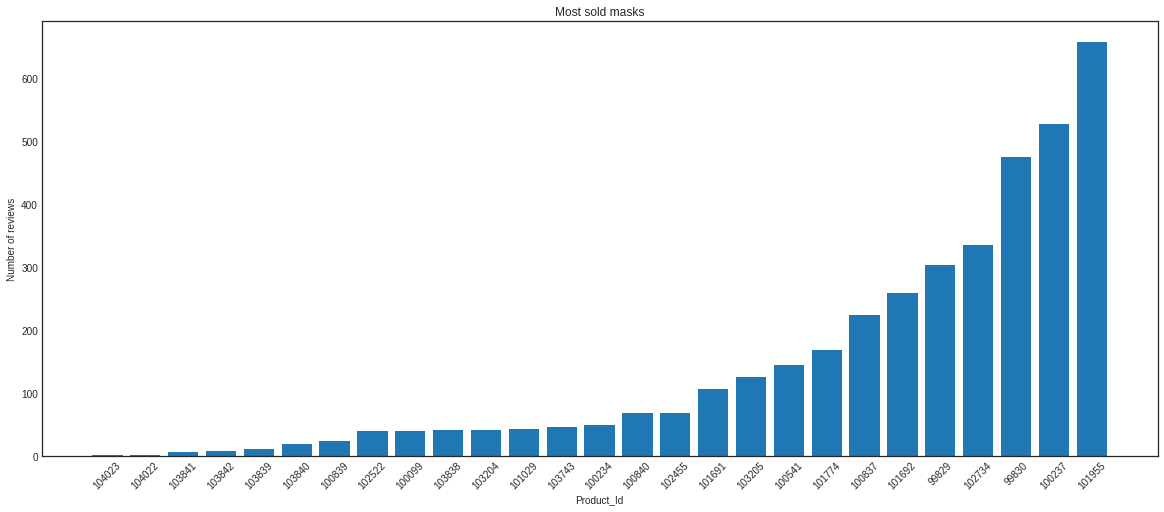

In [219]:
plt.figure(figsize=(20,8))
plt.bar(x=df_for_most_sold.index.astype(str),height=df_for_most_sold ['reviewed'])
plt.xticks(rotation = 45)
plt.title('Most sold masks')
plt.ylabel('Number of reviews')
plt.xlabel('Product_Id')
plt.show()

The most reviewed masks are:

*   101955  --  SunJoy, KN95, Professional Protective Disposable Face Mask, 10 Pack
*   100237 -- Kitsch, 100% Cotton Reuseable Face Masks, Leopard, 3 Pack

These are followed by: 
 
  

*   99830 
*   102734





# **What is yearwise trend of total reviews?**

In [220]:
df_for_year = data.groupby('Date').count()


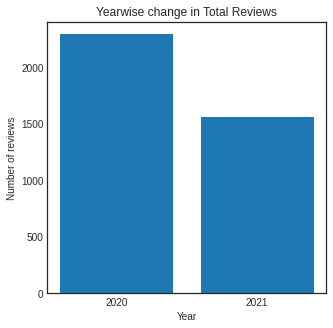

In [221]:
plt.figure(figsize=(5,5))
plt.bar(x=df_for_year.index.astype(str),height=df_for_year['reviewed'])

plt.title('Yearwise change in Total Reviews')
plt.ylabel('Number of reviews')
plt.xlabel('Year')
plt.show()

# Observations:

The number of people reviewing has gone down in 2021.

Possible reasons could be:



*  The data in 2021 is available for only two months i.e. January and February while it is available for the entire year of 2020.  
*  That is the reason why there are less reviews in 2021 as compared to 2020.



# **SENTIMENT ANALYSIS:**

To get the most liked product we have to do sentiment analysis on the reviews of users.

The method I am using here is called TextBlob Analysis.

It gives a polarity score between -1 and +1 according to the review given by the users. 

Here value close to -1 is a negative comment

Value close to +1 is a positive comment

Value close to 0 is a neutral comment

In [222]:
import spacy
from textblob import TextBlob

In [223]:
data['TextBlob_Subjectivity'] = data['Final_Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
data['TextBlob_Polarity'] = data['Final_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [224]:
data['TextBlob_Analysis'] = data['TextBlob_Polarity'].apply(lambda x: 'negative' if x<0 else 'positive')



# **What are the most liked products by users?**

In [225]:
df = data.groupby(['productId']).mean()

Text(0.5, 0, 'Polarity Score')

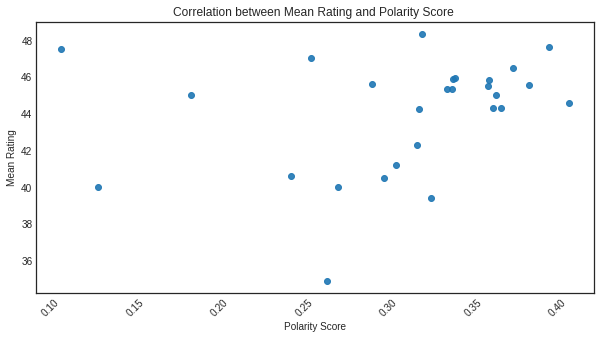

In [226]:
figure = plt.figure(figsize=(10,5))
plt.scatter(x=df.TextBlob_Polarity, y=df.ratingValue,alpha= 0.9, cmap='nipy_spectral')
plt.xticks(rotation = 45)
plt.title('Correlation between Mean Rating and Polarity Score ')
plt.ylabel('Mean Rating')
plt.xlabel('Polarity Score')

# Observations from above graph:



*   There is a very high positive correlation between Polarity score and Rating Value.


# Conclusion:
*   The product which has a high Polarity score as awell as a high Rating Value will be the product which is most liked by the users.



In [227]:
df_for_rating = df.sort_values(by = 'ratingValue')

Text(0.5, 0, 'ProductId')

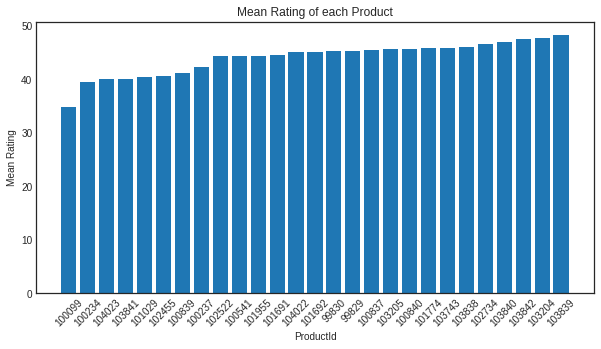

In [228]:
plt.style.use('seaborn-white')
figure = plt.figure(figsize=(10,5))
plt.bar(x=df_for_rating.index.astype(str), height=df_for_rating.ratingValue)
plt.xticks(rotation = 45)
plt.title('Mean Rating of each Product')
plt.ylabel('Mean Rating')
plt.xlabel('ProductId')

Top 5 products according to rating value

*   103839
*   103204
*   103842
*   103840
*   102734







In [229]:
df_for_polarity = df.sort_values(by = 'TextBlob_Polarity')

Text(0.5, 0, 'ProductId')

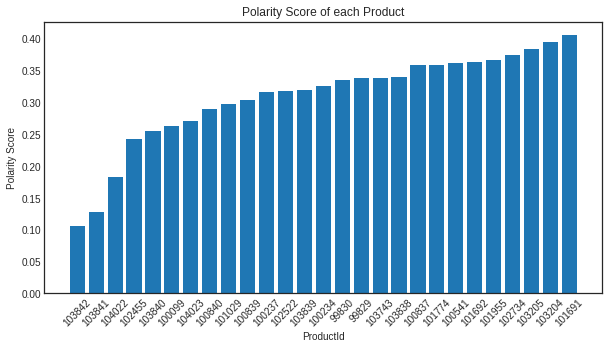

In [230]:
figure = plt.figure(figsize=(10,5))
plt.bar(x=df_for_polarity.index.astype(str), height=df_for_polarity.TextBlob_Polarity)
plt.xticks(rotation = 45)
plt.title('Polarity Score of each Product')
plt.ylabel('Polarity Score')
plt.xlabel('ProductId')

Top 5 products according to Mean of Polarity Score:

*   101691
*   103204
*   103205
*   102734
*   101955







In accordance with the above conclusion:

''Users like the product which has graeter average Rating Value as well as a greater mean of Polarity score''.

# **Products liked most by customers are:**

103204 -- Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,  25 Masks

102734 -- Zidian, Disposable Protective Mask, 50 Pack 

# **What is that the customers are liking most about these products?**

In [231]:
df_for_103204 = data['Final_Review'][(data['productId'] == 103204)  & (data['TextBlob_Analysis'] == 'positive') ]
df_for_102734 = data['Final_Review'][(data['productId'] == 102734)  & (data['TextBlob_Analysis'] == 'positive') ]
df_most_liked = df_for_103204.append(df_for_102734)

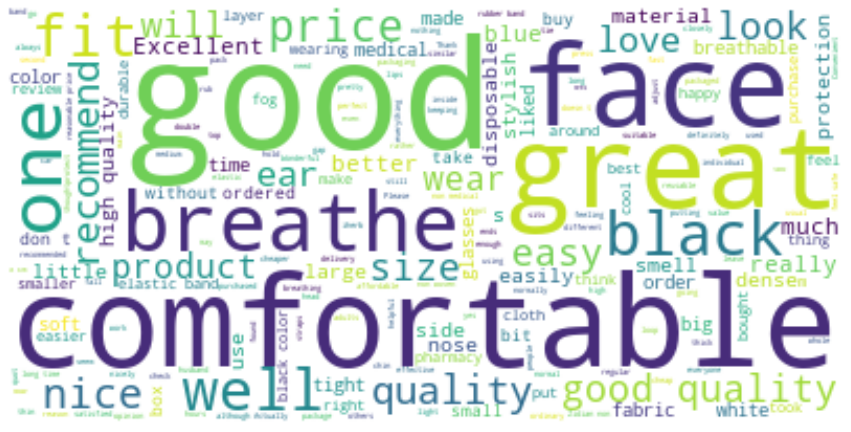

In [232]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
text = " ".join(i for i in df_most_liked)
stopwords = set(STOPWORDS)
stopwords.add('mask')
stopwords.add('masks')
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Observations from word cloud:

The most recurring words are:

Comfortable , good , fit , great , face , breathe , quality , recommend , black (Assuming black coloured masks are more popular than other colours)


Things liked by customers about the most popular masks:

*   The masks are Comfortable
*   The masks fit well
*   They fit well on the face
*   They are comfortable to breathe




  







# **What is the profile of the customers buying the masks?**

In [233]:
df_for_customer = review_data.groupby(['languageCode.1']).count()
df_for_customer = df_for_customer.sort_values(by=['reviewed'], ascending = False).head(5)
df_for_customer

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,translation.reviewText,translation.reviewTitle
languageCode.1,,,,,,,,,,,,,,,,,,
en-US,1855,1855,1855,1855,1855,1855,1855,1855,1855,1853,1853,1855,1855,1855,1855,1855,0,0
ru-RU,1300,1300,1300,1300,1300,1300,1300,1300,1300,1298,1298,1300,1300,1300,1300,1300,1300,1300
ar-SA,227,227,227,227,227,227,227,227,227,226,226,227,227,227,227,227,227,227
he-IL,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167
ja-JP,121,121,121,121,121,121,121,121,121,120,120,121,121,121,121,121,121,121


Text(0.5, 1.0, 'Languages in which most reviews are received')

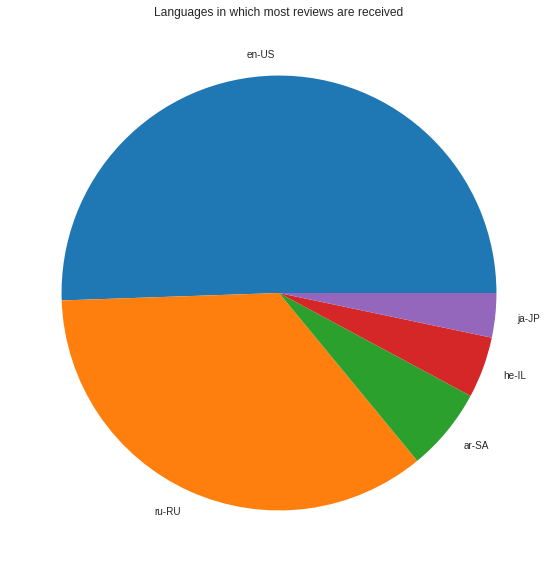

In [234]:
figure = plt.figure(figsize=(10,10))
plt.pie(labels = df_for_customer.index.astype(str), x = df_for_customer.reviewed)

plt.title('Languages in which most reviews are received')


# Conclusion:


The customers who are reviewing most are from either of the following countries:



*   USA
*   Russia

*   South Africa
*   Japan

*   Israel






